# CYCLISTIC RIDESHARE DATA ANALYSIS

## Importing necessary libraries and loading the datasets. 
Here I wrote a function to import the monthly rideshare data from a folder in my local directory. 
I also concatenated all the datadrames into one big dataframe called data. 

In [5]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
# Loading the Datasets

def import_csv_files_from_folder(folder_path):
    """
    Import CSV files from a folder into a Pandas DataFrame.

    Parameters:
    folder_path (str): The path to the folder containing the CSV files.

    Returns:
    dict: A dictionary where keys are file names and values are Pandas DataFrames.
    """
    data = {}  # Create an empty dictionary to store the DataFrames

    # List all files in the folder
    files = os.listdir(folder_path)

    # Iterate through the files and read CSV files into DataFrames
    for file_name in files:
        if file_name.endswith('.csv'):
            file_path = os.path.join(folder_path, file_name)
            # Use the file name (without extension) as the dictionary key
            key = os.path.splitext(file_name)[0]
            data[key] = pd.read_csv(file_path)  # Read CSV into a DataFrame

    return data

# Example usage:
folder_path = r"C:\Users\TORITSEJU\Documents\Cyclistic Data Analysis\Cyclistic Data"
# Replace with the path to your folder
csv_data = import_csv_files_from_folder(folder_path)

# Now, csv_data is a dictionary where keys are file names (without extensions)
# and values are Pandas DataFrames containing the CSV data.


In [7]:
data = pd.concat(csv_data, ignore_index= True)

## A QUICK EXPLORATION OF THE DATA
A quick dive into data shows that we have 5829084 rows and 13 columns. 
There are also missing data which we'll look at in more details soon. 
Some columns-esp the date columns - do not have the appropirate data types. 

In [13]:
data.head(2)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,3564070EEFD12711,electric_bike,2022-04-06 17:42:48,2022-04-06 17:54:36,Paulina St & Howard St,515,University Library (NU),605,42.019135,-87.673532,42.052939,-87.673447,member
1,0B820C7FCF22F489,classic_bike,2022-04-24 19:23:07,2022-04-24 19:43:17,Wentworth Ave & Cermak Rd,13075,Green St & Madison St,TA1307000120,41.853085,-87.631931,41.881892,-87.648789,member


In [26]:
# local_path = r'C:\Users\TORITSEJU\Documents\Cyclistic Data Analysis\Cyclistic Data'

# filenames = glob.glob(local_path + "/*.csv")

# dfs = [pd.read_csv(filename) for filename in filenames]

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5829084 entries, 0 to 5829083
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 578.1+ MB


## Data Pre-processing and Cleaning
* Started_at and ended_at cdolumns were converted into datetime types. 


* Start month, weekday, hour_of_day were extracted from the started_at column.


* Ride_length was calculated by subtracting started_at from ended_at


* Missing entries were analysed and handled by replacing with "unknown".


In [23]:
data.started_at = pd.to_datetime(data.started_at)
data.ended_at = pd.to_datetime(data.ended_at)

#Extracting month, weekday, hour_of_day from started_at column
data['month'] = data['started_at'].dt.month_name()
data['weekday'] = data['started_at'].dt.day_name()
data['start_hour'] = data['started_at'].dt.hour

# Creating ride_length column from started_at and ended_at
data['ride_length'] = data['ended_at'] - data['started_at']

data['ride_length'] = round((data['ride_length'] / pd.Timedelta(minutes=1)),2)


data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,month,weekday,ride_length,start_hour
0,3564070EEFD12711,electric_bike,2022-04-06 17:42:48,2022-04-06 17:54:36,Paulina St & Howard St,515,University Library (NU),605,42.019135,-87.673532,42.052939,-87.673447,member,April,Wednesday,11.80,17
1,0B820C7FCF22F489,classic_bike,2022-04-24 19:23:07,2022-04-24 19:43:17,Wentworth Ave & Cermak Rd,13075,Green St & Madison St,TA1307000120,41.853085,-87.631931,41.881892,-87.648789,member,April,Sunday,20.17,19
2,89EEEE32293F07FF,classic_bike,2022-04-20 19:29:08,2022-04-20 19:35:16,Halsted St & Polk St,TA1307000121,Green St & Madison St,TA1307000120,41.871840,-87.646640,41.881892,-87.648789,member,April,Wednesday,6.13,19
3,84D4751AEB31888D,classic_bike,2022-04-22 21:14:06,2022-04-22 21:23:29,Wentworth Ave & Cermak Rd,13075,Delano Ct & Roosevelt Rd,KA1706005007,41.853085,-87.631931,41.867491,-87.632190,casual,April,Friday,9.38,21
4,5664BCF0D1DE7A8B,electric_bike,2022-04-16 15:56:30,2022-04-16 16:02:11,Halsted St & Polk St,TA1307000121,Clinton St & Madison St,TA1305000032,41.871808,-87.646574,41.882242,-87.641066,member,April,Saturday,5.68,15


### Further Cleaning by Handling Misssing Entries

Missing entries were found in the following columns:


* start_station_name 
* start_station_id
* end_station_name
* end_station_id
* end_lat
* end_lng


After carefully considering all the factors and the nature of missingness of the missing observations in the data, I decided it was best to fill the missing entries in the end_lat and end_lng columns with the mode. 

I also felt it was best to remove the other columns completely from the dataframe since they are not swignificant to the analysis. (Fingers crossed though)

In [67]:
# check which columns have missing entries and how many.

data.isna().sum()

ride_id          0
rideable_type    0
started_at       0
ended_at         0
start_lat        0
start_lng        0
end_lat          0
end_lng          0
member_casual    0
month            0
weekday          0
ride_length      0
start_hour       0
dtype: int64

In [61]:
# Filling the end_lat and end_lng with their modes (41.93, ) respectively
end_lat_mode = data['end_lat'].mode()
end_lng_mode = data['end_lng'].mode()

print(end_lng_mode, end_lat_mode, sep = '\n')


data['end_lat'] = data['end_lat'].fillna(end_lat_mode)
data['end_lng']  = data['end_lng'].fillna(-87.65)

0   -87.65
Name: end_lng, dtype: float64
0    41.93
Name: end_lat, dtype: float64


### Second Aproach of Handling Missing Data

In [66]:
# We drop all the other columns with missing values

data = data.dropna(axis=1)

In [37]:
data_copy = data.copy()

data_copy.dropna(inplace = True)

#### Exporting Cleaned CSV File.

In [78]:
data.to_csv('cylistic_data.csv', index=False, header=True)

## Exploratory Data Analysis

<Axes: >

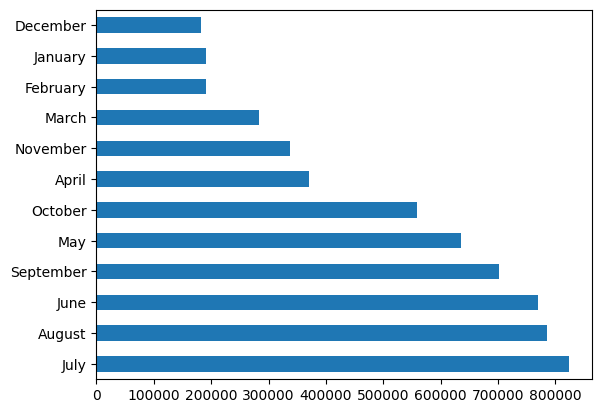

In [72]:
data['month'].value_counts().plot(kind='barh')

<Axes: ylabel='ride_length'>

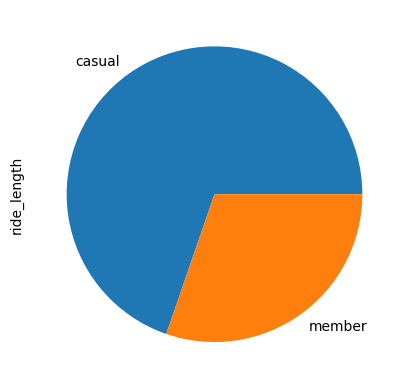

In [75]:
data.groupby('member_casual')['ride_length'].mean().plot(kind= 'pie')